In [1]:
from CBO_TR import *
from COBYLA import *
from COBYQA import *
from test_function_constr import *

In [2]:
#############################################
# Stuff given by the benchmarking algorithm #
#############################################

# i_algorithm = CBO_TR                                        # function CBO_TR
# i_algorithm = COBYLA
i_algorithm = COBYQA
N_x_ = 2                                                    # number of input dimensions
# func_type = 'Rosenbrock_f'
# func_type = 'Antonio_f'
func_type = 'Matyas_f'
f_eval_ = 20                                                 # length of trajectory (function evaluation budget)
track_x = False                                             # TODO Check what this is about in the benchmarking routine
# x_shift = np.array([[0.25],[-0.25]])                          # This is the starting point (=shift of coordinate system) that is different for each repititin in reps. Since Ackley is defined between -5 and 5, a random number between -3 and 3 was chosen in the unconstrained benchmarking routine
                                                            # TODO x_shift is now chosen to fullfill the constraints right from the start. It must be written in a way, where it automatically initializes a point given the constraints
bounds_ = [[-5., 5.], [-5., 5.]] # x1 bounds, x2 bounds these are taken from the benchmarking routine
t_ = Test_function(func_type, n_x=N_x_, track_x=track_x)
i_rep = 1

'''
Original from benchmarking algorithm for unconstrained:
a, b, team_names, cids = i_algorithm(t_.fun_test, N_x_, bounds_, f_eval_)
'''
a, b, team_names, cids, X_opt_plot, TR_l, xnew, backtrck_l, samples_number = i_algorithm(t_, N_x_, bounds_, f_eval_, i_rep)

Starting the optimization procedure.
Initial trust-region radius: 1.0.
Final trust-region radius: 1e-06.
Maximum number of function evaluations: 20.
Maximum number of iterations: 2000.

fun_test([-4.000e+00  4.000e+00]) = 16.0
con_test([-4.000e+00  4.000e+00]) = [ 2.565e+01]
fun_test([-3.000e+00  4.000e+00]) = 12.26
con_test([-3.000e+00  4.000e+00]) = [ 1.933e+01]
fun_test([-4.000e+00  5.000e+00]) = 20.259999999999998
con_test([-4.000e+00  5.000e+00]) = [ 2.665e+01]
fun_test([-5.000e+00  4.000e+00]) = 20.259999999999998
con_test([-5.000e+00  4.000e+00]) = [ 3.196e+01]
fun_test([-4.000e+00  3.000e+00]) = 12.26
con_test([-4.000e+00  3.000e+00]) = [ 2.465e+01]
fun_test([-2.344e+00  3.246e+00]) = 7.817899886945209
con_test([-2.344e+00  3.246e+00]) = [ 1.444e+01]
fun_test([-1.551e+00  2.074e+00]) = 3.2886326033623035
con_test([-1.551e+00  2.074e+00]) = [ 8.263e+00]
fun_test([-5.129e-01  3.648e-01]) = 0.19283448234359274
con_test([-5.129e-01  3.648e-01]) = [-7.350e-14]
fun_test([-7.521e-01 -

### Plotting new

In [3]:
def func_plot(x1,x2, func_type):

    '''This plots the test-function'''

    if func_type == 'Rosenbrock_f':
        return (1.-x1)**2 + 100*(x2-x1**2)**2
    
    if func_type == 'Antonio_f':
        return x1**2 + 3*x2**2 + 0.9*x1*x2
    
    if func_type == 'Matyas_f':
        return 0.26*(x1**2 + x2**2) - 0.48*x1*x2

def cons_plot(x2, func_type):

    '''This plots the constraints'''

    if func_type == 'Rosenbrock_f':

        '''
        This is the Rosenbrock-constraint 
        but re-formulated as x1 = f(x2) for plotting.
        Therefore, x2 is in the return statement and the corresponding x1 values 
        will be calculated to give a list of x1 and x2 for plotting
        '''
        return -1.27 + 2.83*x2 - 0.69*(x2**2)
    
    if func_type == 'Antonio_f':

        return 1.5*x2 + 0.3
    
    if func_type == 'Matyas_f':

        return 6.31225*x2+3.60257
    
cons_plot_l = [cons_plot]
cons_eval_l = [t_.con_test]

TR_plot       = True
n_points = 100
bounds_plot   = [[-5,5],[-5,5]]


In [4]:
def plot_SafeBO(cons_plot_l, bounds_plot, X_opt, xnew, samples_number,
                obj_system, cons_eval_l, func_type,
                TR_plot=False, TR_l=False):
    '''
    cons_plot_l -> list of functions for the constraints for plotting
    cons_eval_l -> list of functions for the constraints for evaluation
    bounds -> list of bounds as [[x1lb,x1ub],[x2lb,x2ub]]
    '''
    # evaluate grid with vmap
    n_points = 100
    x1lb      = bounds_plot[0][0]; x1ub = bounds_plot[0][1]
    x1       = np.linspace(start=x1lb,stop=x1ub,num=n_points)
    x2lb      = bounds_plot[1][0]; x2ub = bounds_plot[1][1]
    x2       = np.linspace(start=x2lb,stop=x2ub,num=n_points)
    X1,X2      = np.meshgrid(x1,x2)
    # create list to plot objective function contour
    y        = func_plot(X1,X2, func_type)
    # evaluate list of points for constraint plot
    con_list = [[con_i(x_i, func_type) for x_i in x2] for con_i in cons_plot_l]
    # define plot
    plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,1,2)
    # add objective contour
    ax3.contour(X1, X2, y, 50)
    # add constraints to plot
    for con_p in con_list:
        if func_type == 'Rosenbrock_f':
            ax3.plot(np.array(con_p),x2, 'black', linewidth=3) #!!! careful here where to put x1 and x2
        else:
            ax3.plot(x1,np.array(con_p), 'black', linewidth=3) #!!! careful here where to put x1 and x2
    # add algorithm evaluations to plot
            
    if i_algorithm.__name__ == 'CBO_TR':

        ### for CBO_TR we want to plot the initial samples to build the first GPs as * ###

        # Calculate the length of the array
        array_length = len(X_opt[samples_number:, 0])
        # Define a color gradient from light red to dark red
        color_gradient = [(0, 0, 1 - i/array_length) for i in range(array_length)]
        # Plot each point with a color from the gradient
        for i in range(array_length):
            ax3.plot(X_opt[samples_number + i, 0], X_opt[samples_number + i, 1], marker='o', color=color_gradient[i])
        # add initial samples to plot
        ax3.plot(X_opt[:samples_number,0], X_opt[:samples_number,1], '*')

    else: 
        # Calculate the length of the array
        array_length = len(X_opt)
        # Define a color gradient from light red to dark red
        color_gradient = [(0, 0, 1 - i/array_length) for i in range(array_length)]
        # Plot each point with a color from the gradient
        for i in range(array_length):
            ax3.plot(X_opt[i, 0], X_opt[i, 1], marker='o', color=color_gradient[i])

    # add trust regions to samples in plot
    if TR_plot == True:
        for i in range(X_opt[samples_number:,:].shape[0]):
            x_pos = X_opt[samples_number+i,0]
            y_pos = X_opt[samples_number+i,1]
            # plt.text(x_pos, y_pos, str(i))
            circle1 = plt.Circle((x_pos, y_pos), radius=TR_l[i], color='black', fill=False, linestyle='--')
            ax3.add_artist(circle1)
    # plot final candidate to plot
    xnew = xnew.flatten()
    ax3.plot(xnew[0], xnew[1], 'yo')
    ax3.set_title('Contour plot')
    ax3.axis([x1lb,x1ub,x2lb,x2ub])

    ### plot constraint satisfaction ###
    # compute constraint values

    if i_algorithm.__name__ == 'CBO_TR':
        X_trajectory = X_opt[samples_number:,:]
    else:
        X_trajectory = X_opt
    all_cons = []
    for con_ii in range(len(con_list)):
        con_list = []
        for p_i in range(X_trajectory.shape[0]):
            con_list.append(-cons_eval_l[con_ii](X_trajectory[p_i,:]))
        all_cons.append(copy.copy(con_list))
        ax1.plot(con_list,'-o')
    ax1.set_title('Constraint satisfaction')
    ax1.grid(True)

    ## plot objective function value trajectory ###
    # compute objective function values
    all_cons = np.array(all_cons)
    obj_list = []
    obj_list.append(obj_system(X_trajectory[0,:]))
    obj_best = obj_system(X_trajectory[0,:])
    for p_i in range(X_trajectory.shape[0]-1):
        obj_new = obj_system(X_trajectory[p_i+1,:])
        if np.max(all_cons[:,p_i+1])<=0:
            obj_best = min(obj_best,obj_new)
        obj_list.append(obj_best)
    ax2.plot(obj_list,'-o')
    ax2.set_title('Objective function')
    ax2.grid(True)
    plt.tight_layout()
    plt.show()


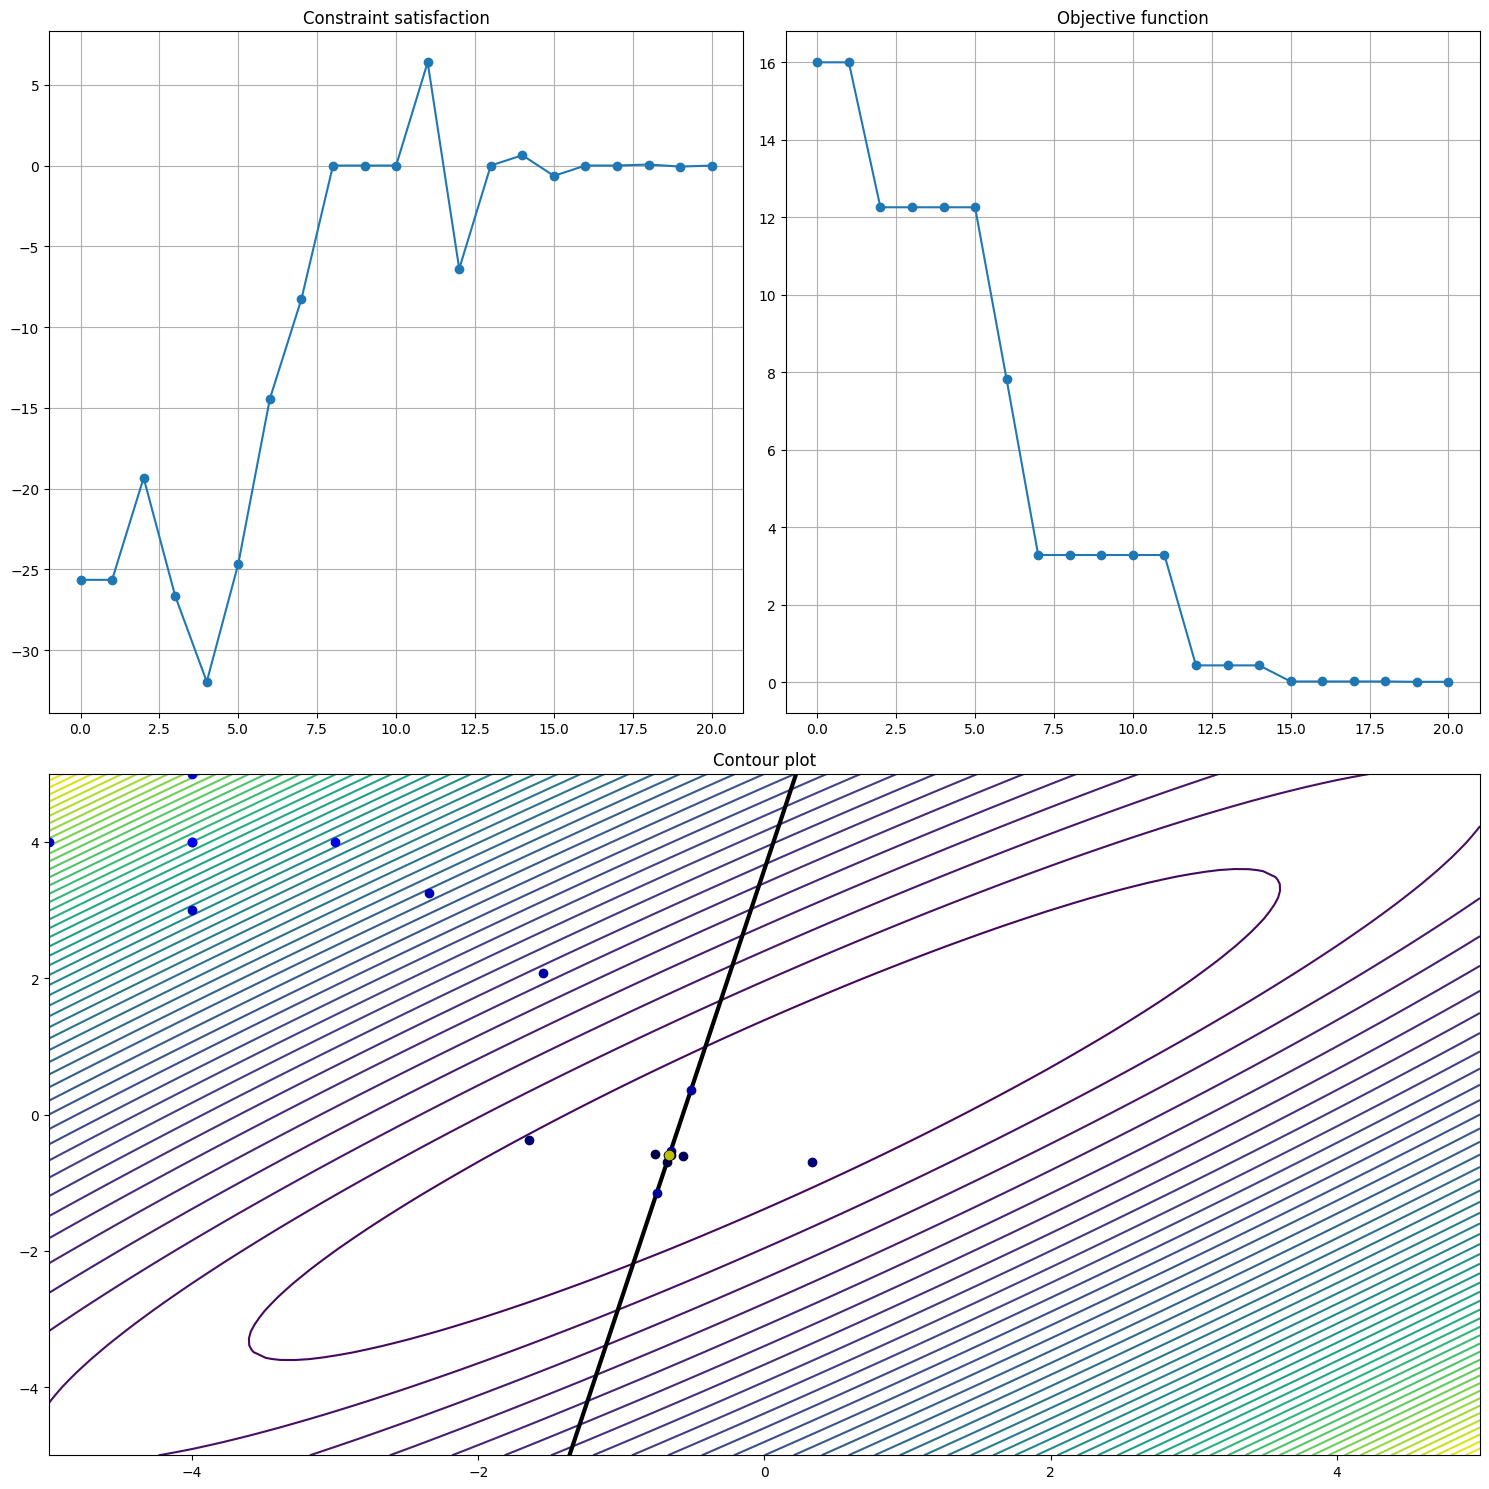

In [5]:
plot_SafeBO(cons_plot_l, bounds_plot, X_opt_plot, xnew, samples_number,
            t_.fun_test, cons_eval_l, 
            func_type, 
            TR_plot, TR_l)

### Plotting old

In [6]:
backtrck_l                                       = [False, *backtrck_l]


n_points = 200
# # Plot a sin curve using the x and y axes.

x_1      = np.linspace(-2.,2., n_points)
x_2      = np.linspace(-1.,3., n_points)
x        = [[x,y] for x in x_1 for y in x_2]
x        = np.array(x)
x        = x.T


# --- plotting functions --- # (CHANGE MANUALLY)

# plotting objective
def simplefunc_plot(x):


    # # ### Ackley_function ###
    # a = 20.; b=0.2; c=2.*np.pi
    # return -a * np.exp(-b*np.sqrt(1./N_x_*((x[0,:]**2)+x[1,:]**2))) - np.exp(1./N_x_*((np.cos(c*x[0,:])+np.cos(c*x[1,:]))) + a + np.exp(1.) )

    ### Rosenbrock_function ###
    z = 100*(x[1,:]-x[0,:]**1)**2 + (x[0,:]-1)**2
    return z

f = simplefunc_plot(x)

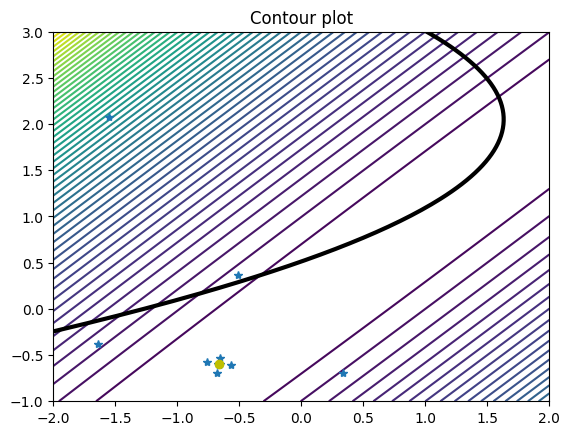

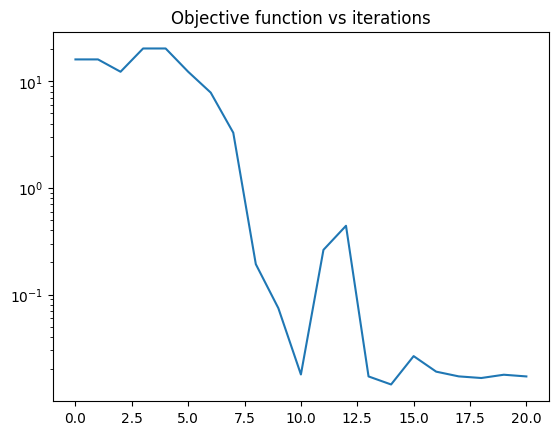

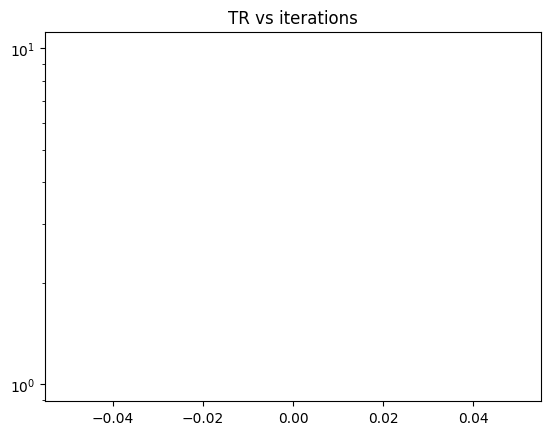

In [7]:
# plotting constraint g1

# constraint Ackley
# g1Simple_plot = [1.05* (np.log(-2.24/(x-2.06))/np.log(2))for x in x_2]

# constraint Rosenbrock
g1Simple_plot = [-1.27 + 2.83*x - 0.69*(x**2) for x in x_2]

# Contour plot
f_copy = f.reshape((n_points,n_points),order='F')

fig, ax  = plt.subplots()
CS       = ax.contour(x_1, x_2, f_copy, 50)
ax.plot(g1Simple_plot, x_2, 'black', linewidth=3)
ax.plot(X_opt_plot[samples_number:,0], X_opt_plot[samples_number:,1], 'ro')
ax.plot(X_opt_plot[:samples_number,0], X_opt_plot[:samples_number,1], '*')
tr_bktrc = 0
for i in range(X_opt_plot[samples_number:,:].shape[0]):
    if backtrck_l[i]==False:
        x_pos = X_opt_plot[samples_number+i,0]
        y_pos = X_opt_plot[samples_number+i,1]
        #plt.text(x_pos, y_pos, str(i))
    circle1 = plt.Circle((x_pos, y_pos), radius=TR_l[i], color='black', fill=False, linestyle='--')
    ax.add_artist(circle1)

try:
    ax.plot(xnew[0][0], xnew[0][1], 'yo')

except:
    ax.plot(xnew[0], xnew[1], 'yo')

ax.set_title('Contour plot')
plt.axis([-2.,2, -1,3])
plt.show()

# compute all objective function values
obj_list = []
for p_i in range(X_opt_plot.shape[0]):
    obj_list.append(t_.fun_test(X_opt_plot[p_i,:]))

fig, ax = plt.subplots()
ax.plot(obj_list)
plt.yscale('log')
ax.set_title('Objective function vs iterations')
plt.show()

# compute all Trust region values
TR_list = []
for p_i in range(len(TR_l)):
    TR_list.append(TR_l[p_i])

fig, ax = plt.subplots()
ax.plot(TR_list)
plt.yscale('log')
ax.set_title('TR vs iterations')
plt.show()